# FINAL PROJECT PRESENTATION - CORONA VIRUS DATASET
## GROUP MEMBERS

In [2]:
# Importing Necessary libraries
# Libraries for handling dataframes
import numpy as np
import pandas as pd

In [3]:
# library for math functions
import math

In [4]:
# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Library for web scraping
import urllib 

In [6]:
# Library for regression analysis
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# Reading the structured dataset into a pandas dataframe
IN_C19_df = pd.read_csv("IN-COVID.csv")
IN_C19M_df = pd.read_csv("IN-MASK.csv")
CN_C19_df = pd.read_csv("CN-COVID.csv")
CN_C19M_df = pd.read_csv("CN-MASK.csv")
US_C19_df = pd.read_csv("US-COVID.csv")
US_C19M_df = pd.read_csv("US-MASK.csv")
CN_C19_df.info()
IN_C19_df.info()
US_C19M_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             467 non-null    int64  
 1   iso_code                               467 non-null    object 
 2   continent                              467 non-null    object 
 3   location                               467 non-null    object 
 4   date                                   467 non-null    object 
 5   total_cases                            467 non-null    float64
 6   new_cases                              466 non-null    float64
 7   new_cases_smoothed                     461 non-null    float64
 8   total_deaths                           467 non-null    float64
 9   new_deaths                             466 non-null    float64
 10  new_deaths_smoothed                    461 non-null    float64
 11  total_

In [8]:
CN_C19_df['date'] = pd.to_datetime(CN_C19_df['date'])
IN_C19_df['date'] = pd.to_datetime(IN_C19_df['date'])
US_C19_df['date'] = pd.to_datetime(US_C19_df['date'])
CN_C19M_df['date'] = pd.to_datetime(CN_C19M_df['Day'])
IN_C19M_df['date'] = pd.to_datetime(IN_C19M_df['Day'])
US_C19M_df['date'] = pd.to_datetime(US_C19M_df['Day'])
CN_C19M_df.drop(CN_C19M_df.columns[[0,1,2,3]],axis=1,inplace=True)
IN_C19M_df.drop(IN_C19M_df.columns[[0,1,2,3]],axis=1,inplace=True)
US_C19M_df.drop(US_C19M_df.columns[[0,1,2,3]],axis=1,inplace=True)


In [9]:
IN_C19_df = IN_C19_df.merge(IN_C19M_df, on='date')
CN_C19_df = CN_C19_df.merge(CN_C19M_df, on='date')
US_C19_df = US_C19_df.merge(US_C19M_df, on='date')


In [10]:
IN_C19_df.describe()
CN_C19_df.info()
frames = [CN_C19_df, IN_C19_df, US_C19_df]
Cov19_df = pd.concat(frames)
print(Cov19_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             461 non-null    int64         
 1   iso_code                               461 non-null    object        
 2   continent                              461 non-null    object        
 3   location                               461 non-null    object        
 4   date                                   461 non-null    datetime64[ns]
 5   total_cases                            461 non-null    float64       
 6   new_cases                              460 non-null    float64       
 7   new_cases_smoothed                     455 non-null    float64       
 8   total_deaths                           461 non-null    float64       
 9   new_deaths                             460 non-null    float64   

In [11]:
# Columns 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million' has a high percentage of null values and is also not insightful for our analysis.
# Therefore we have decided to drop these from the dataframe
cols = [range(18,25)]
Cov19_df.drop(Cov19_df.columns[cols],axis=1,inplace=True)
# Renaming the column names in "C19_df" for better usability
print(Cov19_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 454
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             1373 non-null   int64         
 1   iso_code                               1373 non-null   object        
 2   continent                              1373 non-null   object        
 3   location                               1373 non-null   object        
 4   date                                   1373 non-null   datetime64[ns]
 5   total_cases                            1373 non-null   float64       
 6   new_cases                              1371 non-null   float64       
 7   new_cases_smoothed                     1356 non-null   float64       
 8   total_deaths                           1294 non-null   float64       
 9   new_deaths                             1293 non-null   float64  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [12]:
Cov19_df = Cov19_df.reset_index(drop=True)

In [ ]:
Cov19_df = Cov19_df.replace(np.nan, '', regex=True)

In [13]:
Cov19_df['date'] = pd.to_datetime(Cov19_df['date'])

In [13]:
Cov19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             1373 non-null   int64         
 1   iso_code                               1373 non-null   object        
 2   continent                              1373 non-null   object        
 3   location                               1373 non-null   object        
 4   date                                   1373 non-null   datetime64[ns]
 5   total_cases                            1373 non-null   float64       
 6   new_cases                              1371 non-null   float64       
 7   new_cases_smoothed                     1356 non-null   float64       
 8   total_deaths                           1294 non-null   float64       
 9   new_deaths                             1293 non-null   float64 

# Analysis 1 – Analyzing the cases and deaths due to Corona Virus in China, India and US over time

In [15]:
cols1 = ['location','iso_code','date','total_cases','total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed','total_deaths_per_million','total_cases_per_million']
analysis1= Cov19_df[cols1]
analysis1.set_index('date', inplace= True)
display(Cov19_df[cols1].sort_values(by='date', ascending= False).head(20).style.background_gradient(cmap='Reds'))
analysis1.info()
#print(Cov19_df)


,location,iso_code,date,total_cases,total_deaths,new_cases_smoothed,new_deaths_smoothed,total_deaths_per_million,total_cases_per_million
917,India,IND,2021-04-30 00:00:00,19164969.000000,211853.000000,364926.857000,3187.000000,153.516000,13887.615000
916,India,IND,2021-04-29 00:00:00,18762976.000000,208330.000000,357040.143000,3058.571000,150.963000,13596.316000
915,India,IND,2021-04-28 00:00:00,18376421.000000,204832.000000,349378.143000,2882.143000,148.429000,13316.205000
914,India,IND,2021-04-27 00:00:00,17997113.000000,201187.000000,340140.429000,2662.000000,145.787000,13041.345000
460,China,CHN,2021-04-26 00:00:00,102399.000000,4845.000000,19.286000,0.000000,3.366000,71.144000
913,India,IND,2021-04-26 00:00:00,17636186.000000,197894.000000,330744.857000,2480.571000,143.401000,12779.804000
459,China,CHN,2021-04-25 00:00:00,102384.000000,4845.000000,20.286000,0.000000,3.366000,71.133000
912,India,IND,2021-04-25 00:00:00,17313163.000000,195123.000000,321622.571000,2336.286000,141.393000,12545.730000
458,China,CHN,2021-04-24 00:00:00,102367.000000,4845.000000,23.714000,0.000000,3.366000,71.122000
911,India,IND,2021-04-24 00:00:00,16960172.000000,192311.000000,310309.857000,2165.857000,139.355000,12289.941000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1373 entries, 2020-01-22 to 2021-04-20
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location                  1373 non-null   object 
 1   iso_code                  1373 non-null   object 
 2   total_cases               1373 non-null   float64
 3   total_deaths              1294 non-null   float64
 4   new_cases_smoothed        1356 non-null   float64
 5   new_deaths_smoothed       1356 non-null   float64
 6   total_deaths_per_million  1294 non-null   float64
 7   total_cases_per_million   1373 non-null   float64
dtypes: float64(6), object(2)
memory usage: 96.5+ KB


location
China            AxesSubplot(0.125,0.125;0.775x0.755)
India            AxesSubplot(0.125,0.125;0.775x0.755)
United States    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

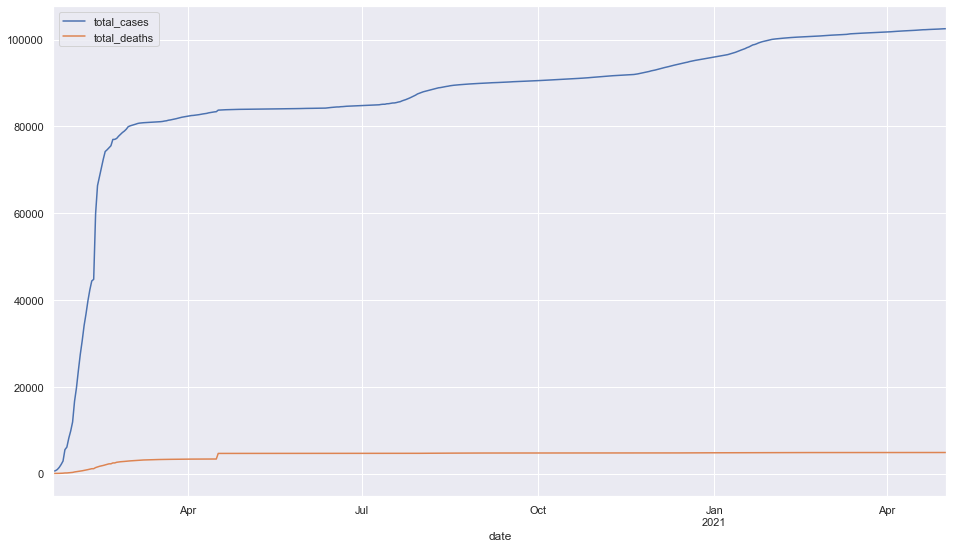

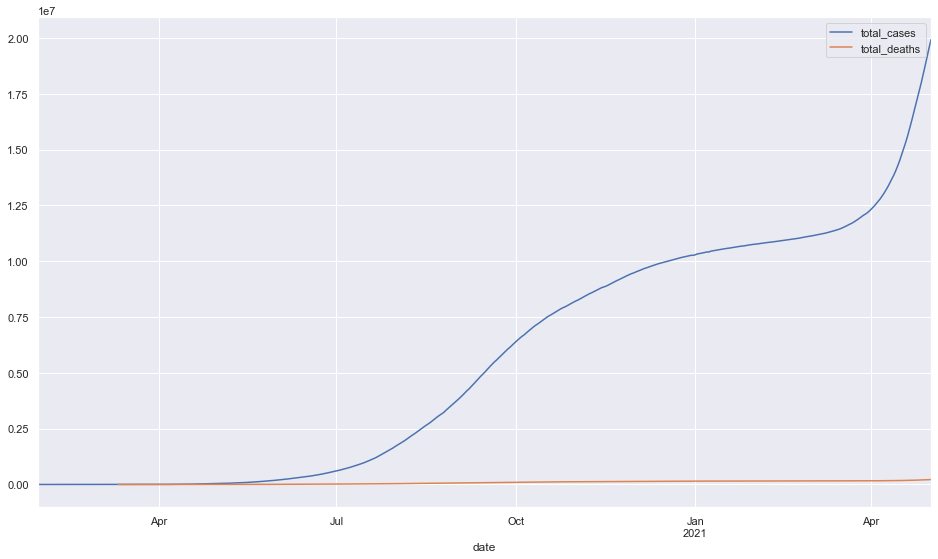

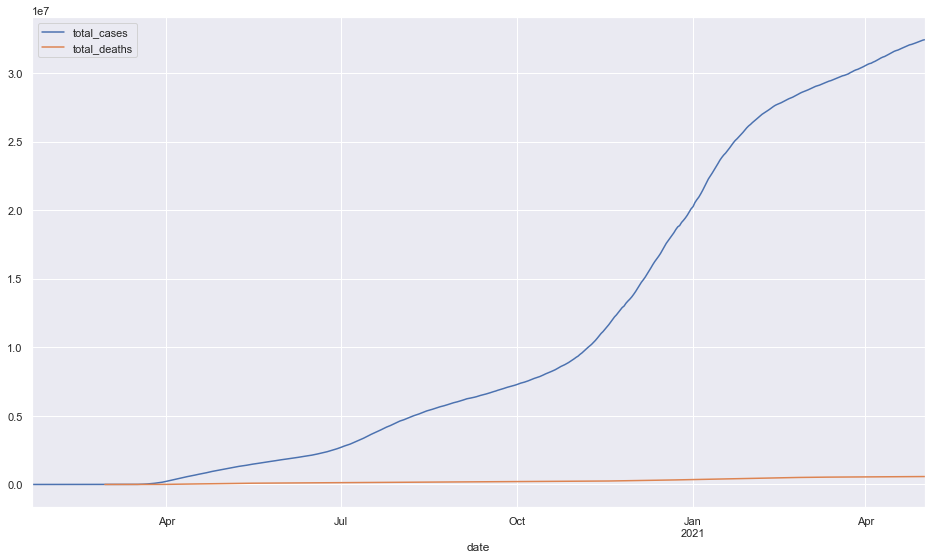

In [ ]:
sns.set(rc={'figure.figsize':(16, 9)})
plot_attr = ['location','total_cases', 'total_deaths']
analysis1.groupby('location').plot(y= plot_attr)

location
China            AxesSubplot(0.125,0.125;0.775x0.755)
India            AxesSubplot(0.125,0.125;0.775x0.755)
United States    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

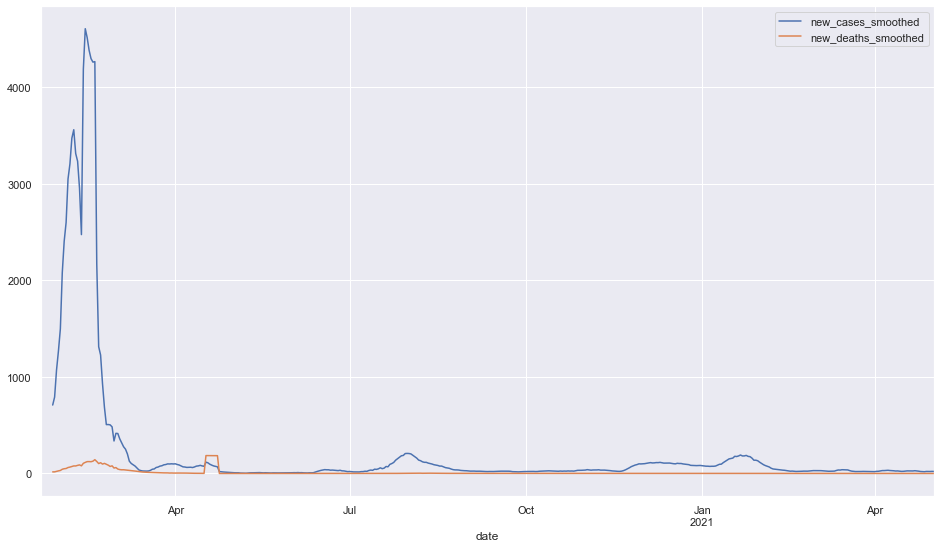

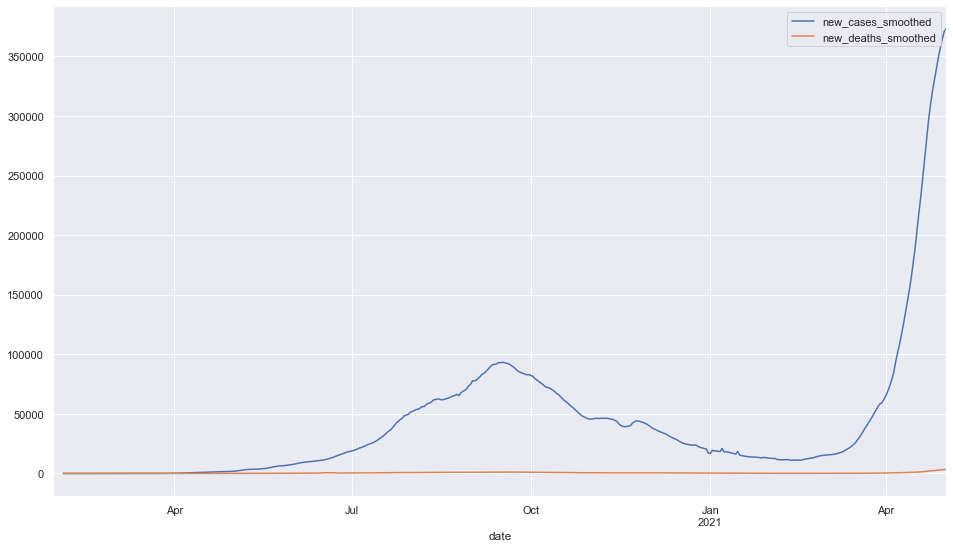

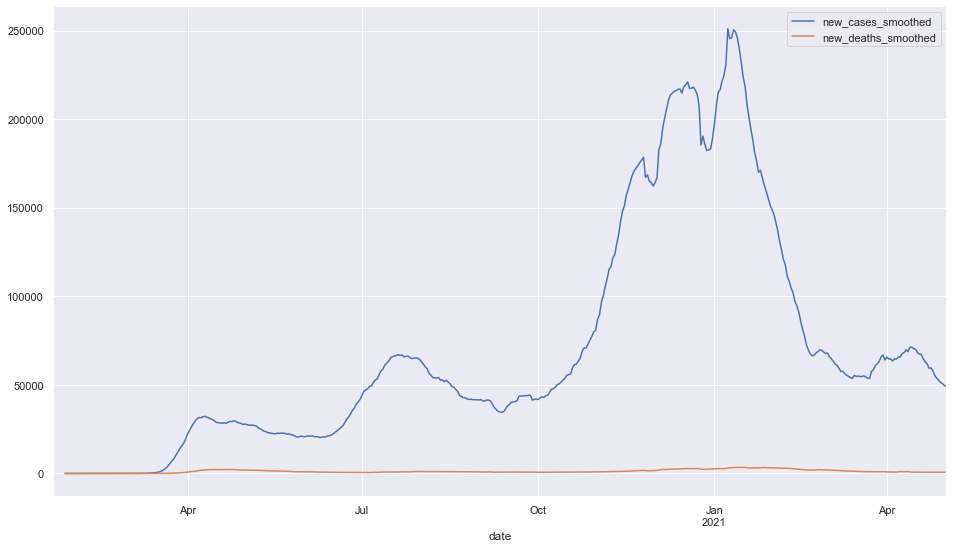

In [ ]:
sns.set(rc={'figure.figsize':(16, 9)})
plot_attr = ['location','new_cases_smoothed', 'new_deaths_smoothed']
analysis1.groupby('location').plot(y= plot_attr)

# Analysis 2 – Analyzing the effectiveness of mask policies against death rates in China, India and US over time

In [ ]:
#analysis2
cols2 = ['location','iso_code','date','new_deaths','total_deaths_per_million', 'facial_coverings']

analysis2= Cov19_df[cols2]

analysis2.set_index('date', inplace= True)
analysis2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1373 entries, 2020-01-22 to 2021-04-20
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location                  1373 non-null   object 
 1   iso_code                  1373 non-null   object 
 2   new_deaths                1293 non-null   float64
 3   total_deaths_per_million  1294 non-null   float64
 4   facial_coverings          1373 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 64.4+ KB


location
China            AxesSubplot(0.125,0.125;0.775x0.755)
India            AxesSubplot(0.125,0.125;0.775x0.755)
United States    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

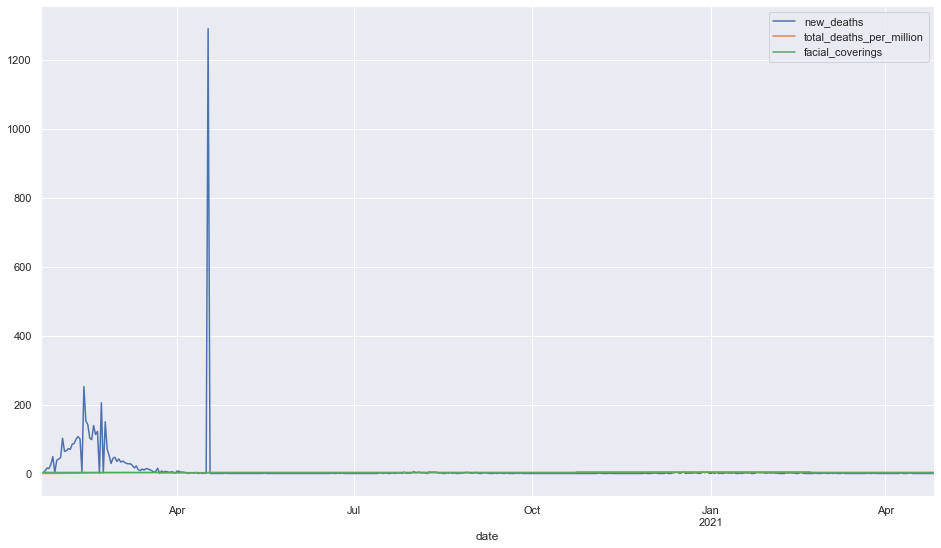

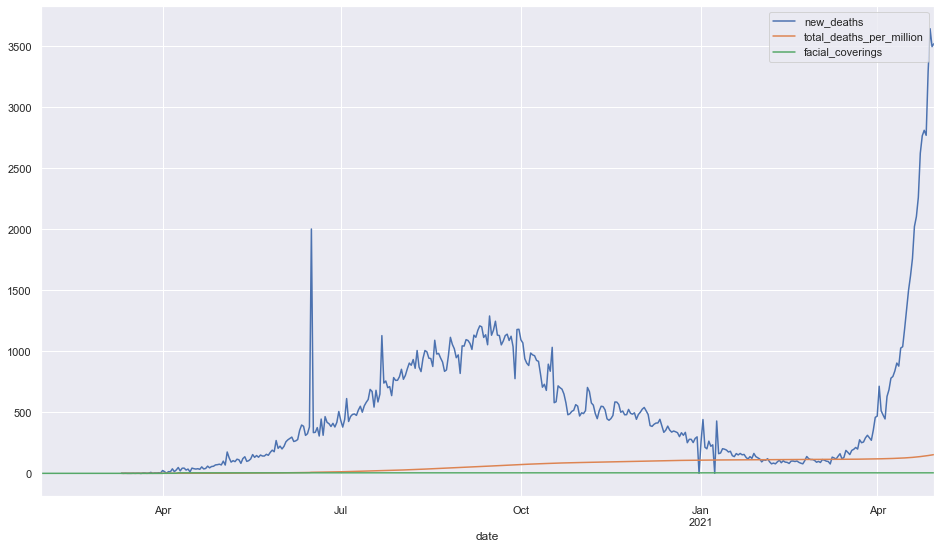

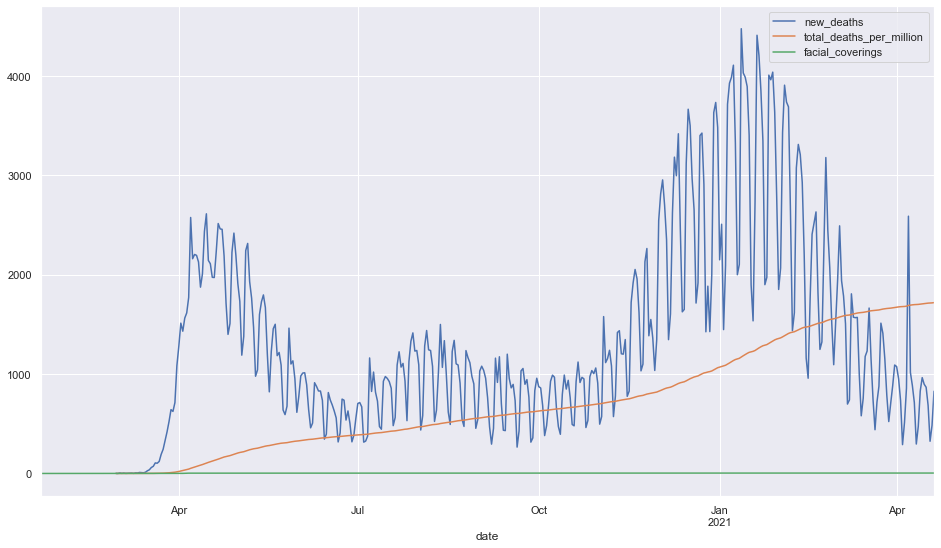

In [ ]:
sns.set(rc={'figure.figsize':(16, 9)})
plot_attr2 = ['location','new_deaths', 'total_deaths_per_million', 'facial_coverings']
analysis2.groupby('location').plot(y= plot_attr2)

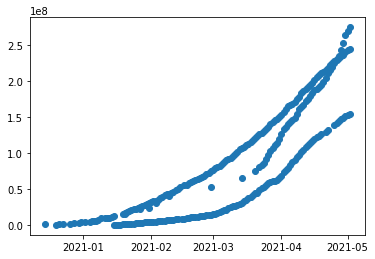

In [ ]:
plt.scatter(Cov19_df['date'], Cov19_df['total_vaccinations'])

# Analysis 3 – Performance of the United States in vaccinating the population compared to testing. 
## Similar analysis was performed for China and India.

In [14]:
cols3 = ['location','total_tests','total_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']
analysis3 = Cov19_df[cols3]
#analysis3.fillna(0, inplace=True)
analysis3 = analysis3.groupby("location").max("total_vaccinations").reset_index()
print(analysis3)


        location  ...  people_fully_vaccinated_per_hundred
0          China  ...                                  NaN
1          India  ...                                 1.93
2  United States  ...                                25.78

[3 rows x 6 columns]


In [15]:
analysis3.set_index('location', inplace= True)

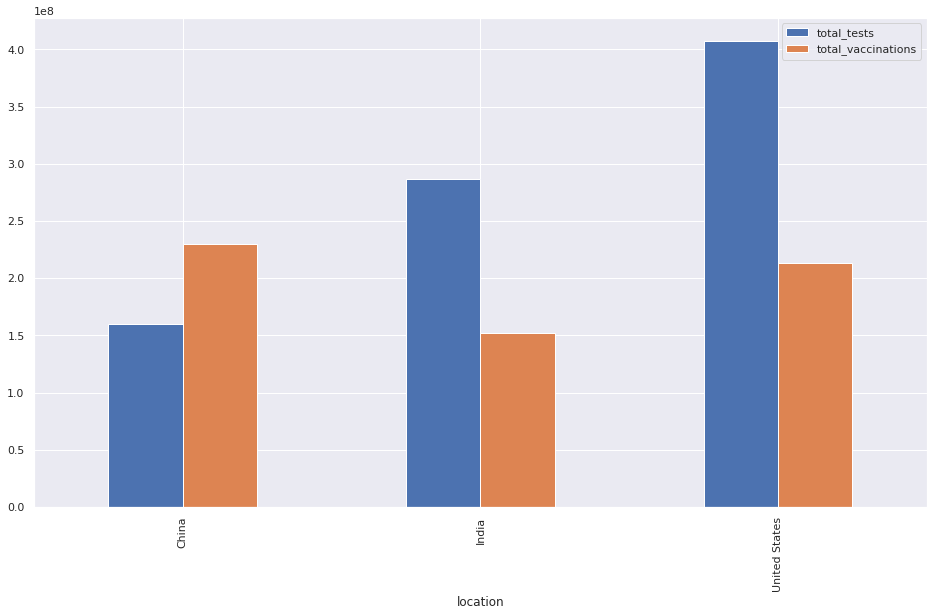

In [16]:
sns.set(rc={'figure.figsize':(16, 9)})
plt3 = ['total_tests','total_vaccinations']
analysis3[plt3].plot.bar()

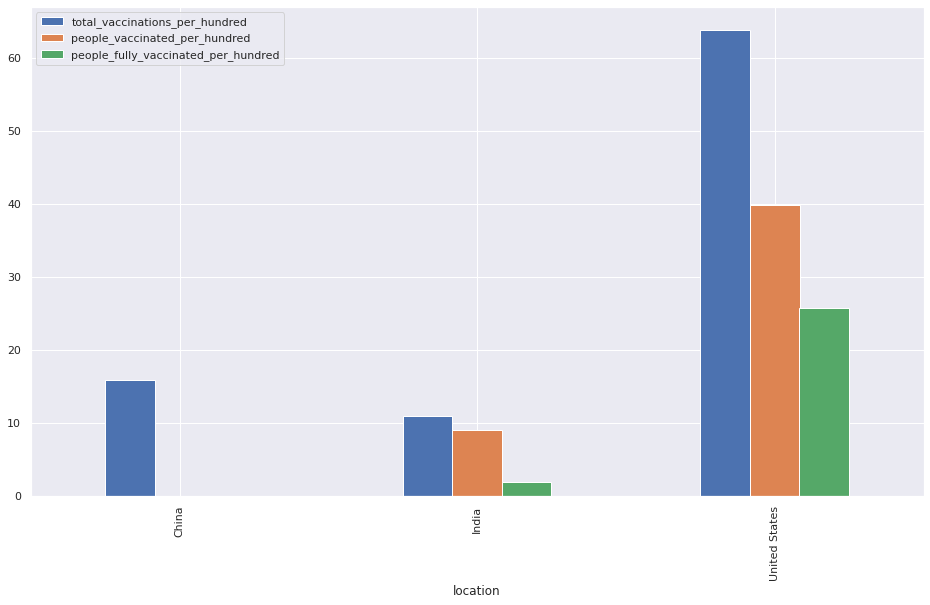

In [17]:
sns.set(rc={'figure.figsize':(16, 9)})
plt4 = ['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']
analysis3[plt4].plot.bar()